Finished


# A.GET DATA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
print('Finished')

Finished


In [ ]:
!pip install gspread oauth2client

In [2]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

In [3]:
# Replace with your spreadsheet URL or spreadsheet key
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1aBGuvg3PwaCKid7iqEsCKwk6ypyt8eXXfKoljnCuWeg/edit?gid=1619127357#gid=1619127357'
# Or you can use this
spreadsheet_key = '1aBGuvg3PwaCKid7iqEsCKwk6ypyt8eXXfKoljnCuWeg'

# spreadsheet = gc.open_by_url(spreadsheet_url)
spreadsheet = gc.open_by_key(spreadsheet_key)

# Select the worksheet (by title or index)
# worksheet = spreadsheet.worksheet('Sheet1')  # Replace 'Sheet1' with your worksheet name
worksheet = spreadsheet.get_worksheet(1)  # Get the first worksheet (index 0)

In [12]:
# Get all values from the worksheet as a list of lists
data = worksheet.get_all_values()

# Create a pandas DataFrame from the data
df = pd.DataFrame(data[1:], columns=data[0])  # Assuming the first row contains headers

# Now you can work with the DataFrame 'df'
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0


In [13]:
df.rename(columns={'Churned':'Exited'},inplace=True)

In [14]:
df.describe()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,2932,460,3,2,70,11,6382,4,2,2,9999,2
top,15634602,Smith,850,France,Male,37,2,0,1,1,1,24924.92,0
freq,1,32,233,5014,5457,478,1048,3617,5084,7055,5151,2,7963


In [ ]:
print(f'Số hàng là {df.shape[0]}')

Số hàng là 10000


  ****B.DATA CLEANING****<br>

## **I. Checking Missing data**

In [ ]:
df.isnull().sum()

,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


## II.Removing duplicates

In [ ]:
print(f'Số hàng duplicated là {df.duplicated().sum()}')

Số hàng duplicated là 0


## III. Outiler

In [ ]:
# Identify numerical columns
sns.set_style("darkgrid")
numerical_columns = df.select_dtypes(include=["int64","float64"]).columns

# Boxplot for numerical data
# Plot distribution of each numerical feature
plt.figure(figsize=(15, len(numerical_columns)*3 ))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 5,idx)
    sns.boxplot(df[feature])
    plt.title(f'{feature}')
    plt.xlabel('')
# Adjust layout and show plots
plt.tight_layout()
plt.show()



<Figure size 1500x0 with 0 Axes>

In [ ]:
# IQR
def detect_outiler(column):
    Q1 = np.percentile(df[column], 25, method='midpoint')
    Q3 = np.percentile(df[column], 90, method='midpoint')
    IQR = Q3 - Q1
    upper = Q3+1.5*IQR
    lower = Q1-1.5*IQR
    return df[(df[column] >= upper)|(df[column]<=lower)]
detect_outiler('Age').count()

CustomerId         4
Surname            4
CreditScore        4
Geography          4
Gender             4
Age                4
Tenure             4
Balance            4
NumOfProducts      4
HasCrCard          4
IsActiveMember     4
EstimatedSalary    4
Exited             4
dtype: int64

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


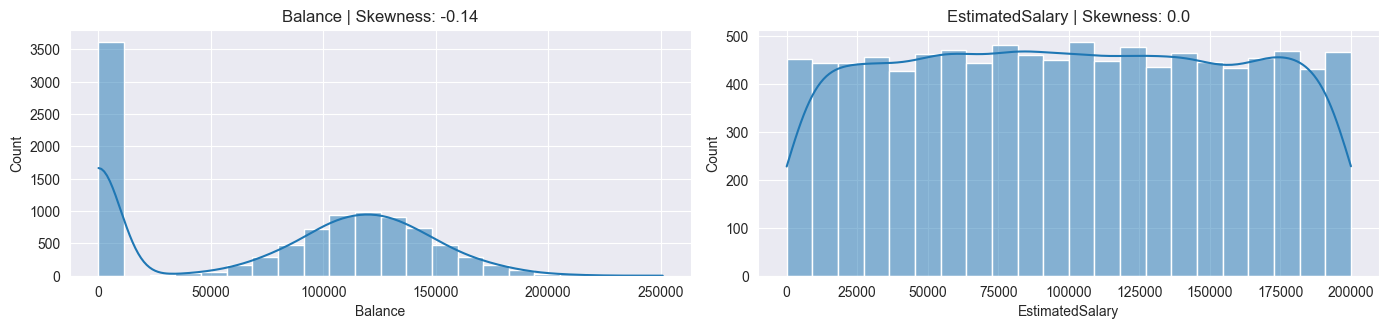

In [ ]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes(include=["float64"]).columns
# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

In [ ]:
df[df['Balance']>=127644.240000]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
15,15643966,Goforth,616,Germany,Male,45,3,143129.41,2,0,1,64327.26,0
16,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9986,15581736,Bartlett,673,Germany,Male,47,1,183579.54,2,0,1,34047.54,0
9987,15588839,Mancini,606,Spain,Male,30,8,180307.73,2,1,1,1914.41,0
9993,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0


<Axes: >

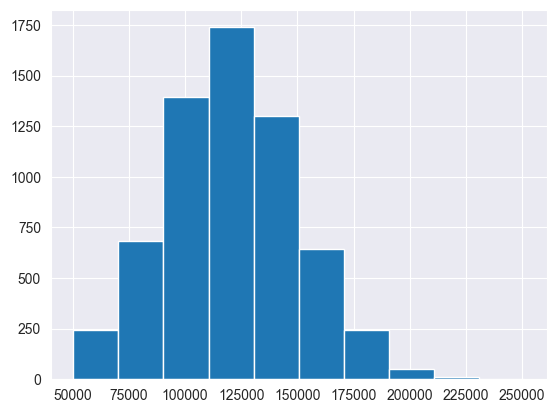

In [ ]:
Q1 = np.percentile(df['Balance'], 50, method='midpoint')
df[df['Balance'] > 50000]['Balance'].hist()

# II.EDA

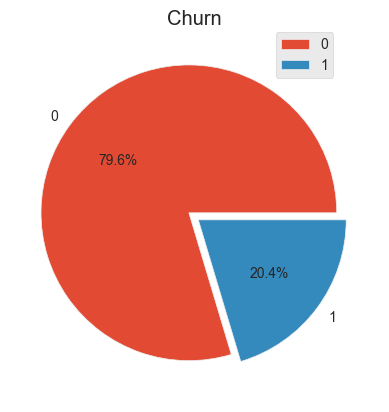

In [ ]:
#ploting
f, ax1 = plt.subplots()
ax1 = df['Exited'].value_counts().plot(kind = 'pie',autopct="%1.1f%%",ylabel='', explode= [0.05,0.03], title ='Churn', legend=['1',0])
plt.legend(bbox_to_anchor=(0.7, 1.02), loc='upper left')
plt.show()

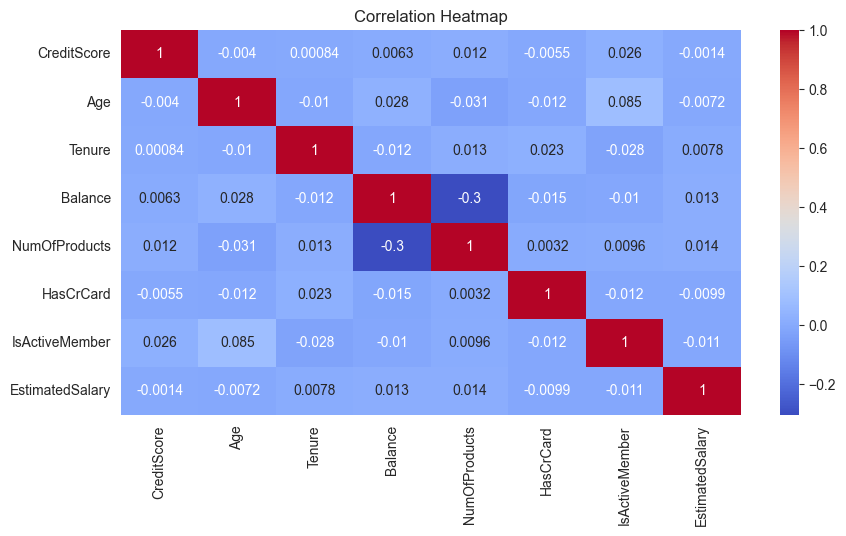

In [ ]:
sns.set_palette("Pastel1")
numerical_columns = df.select_dtypes(include=["int64","float64"]).columns
df_num = df[numerical_columns[1:-1]]
plt.figure(figsize=(10, 5))
# Using Seaborn to create a heatmap
sns.heatmap(df_num.corr(),annot=True ,cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

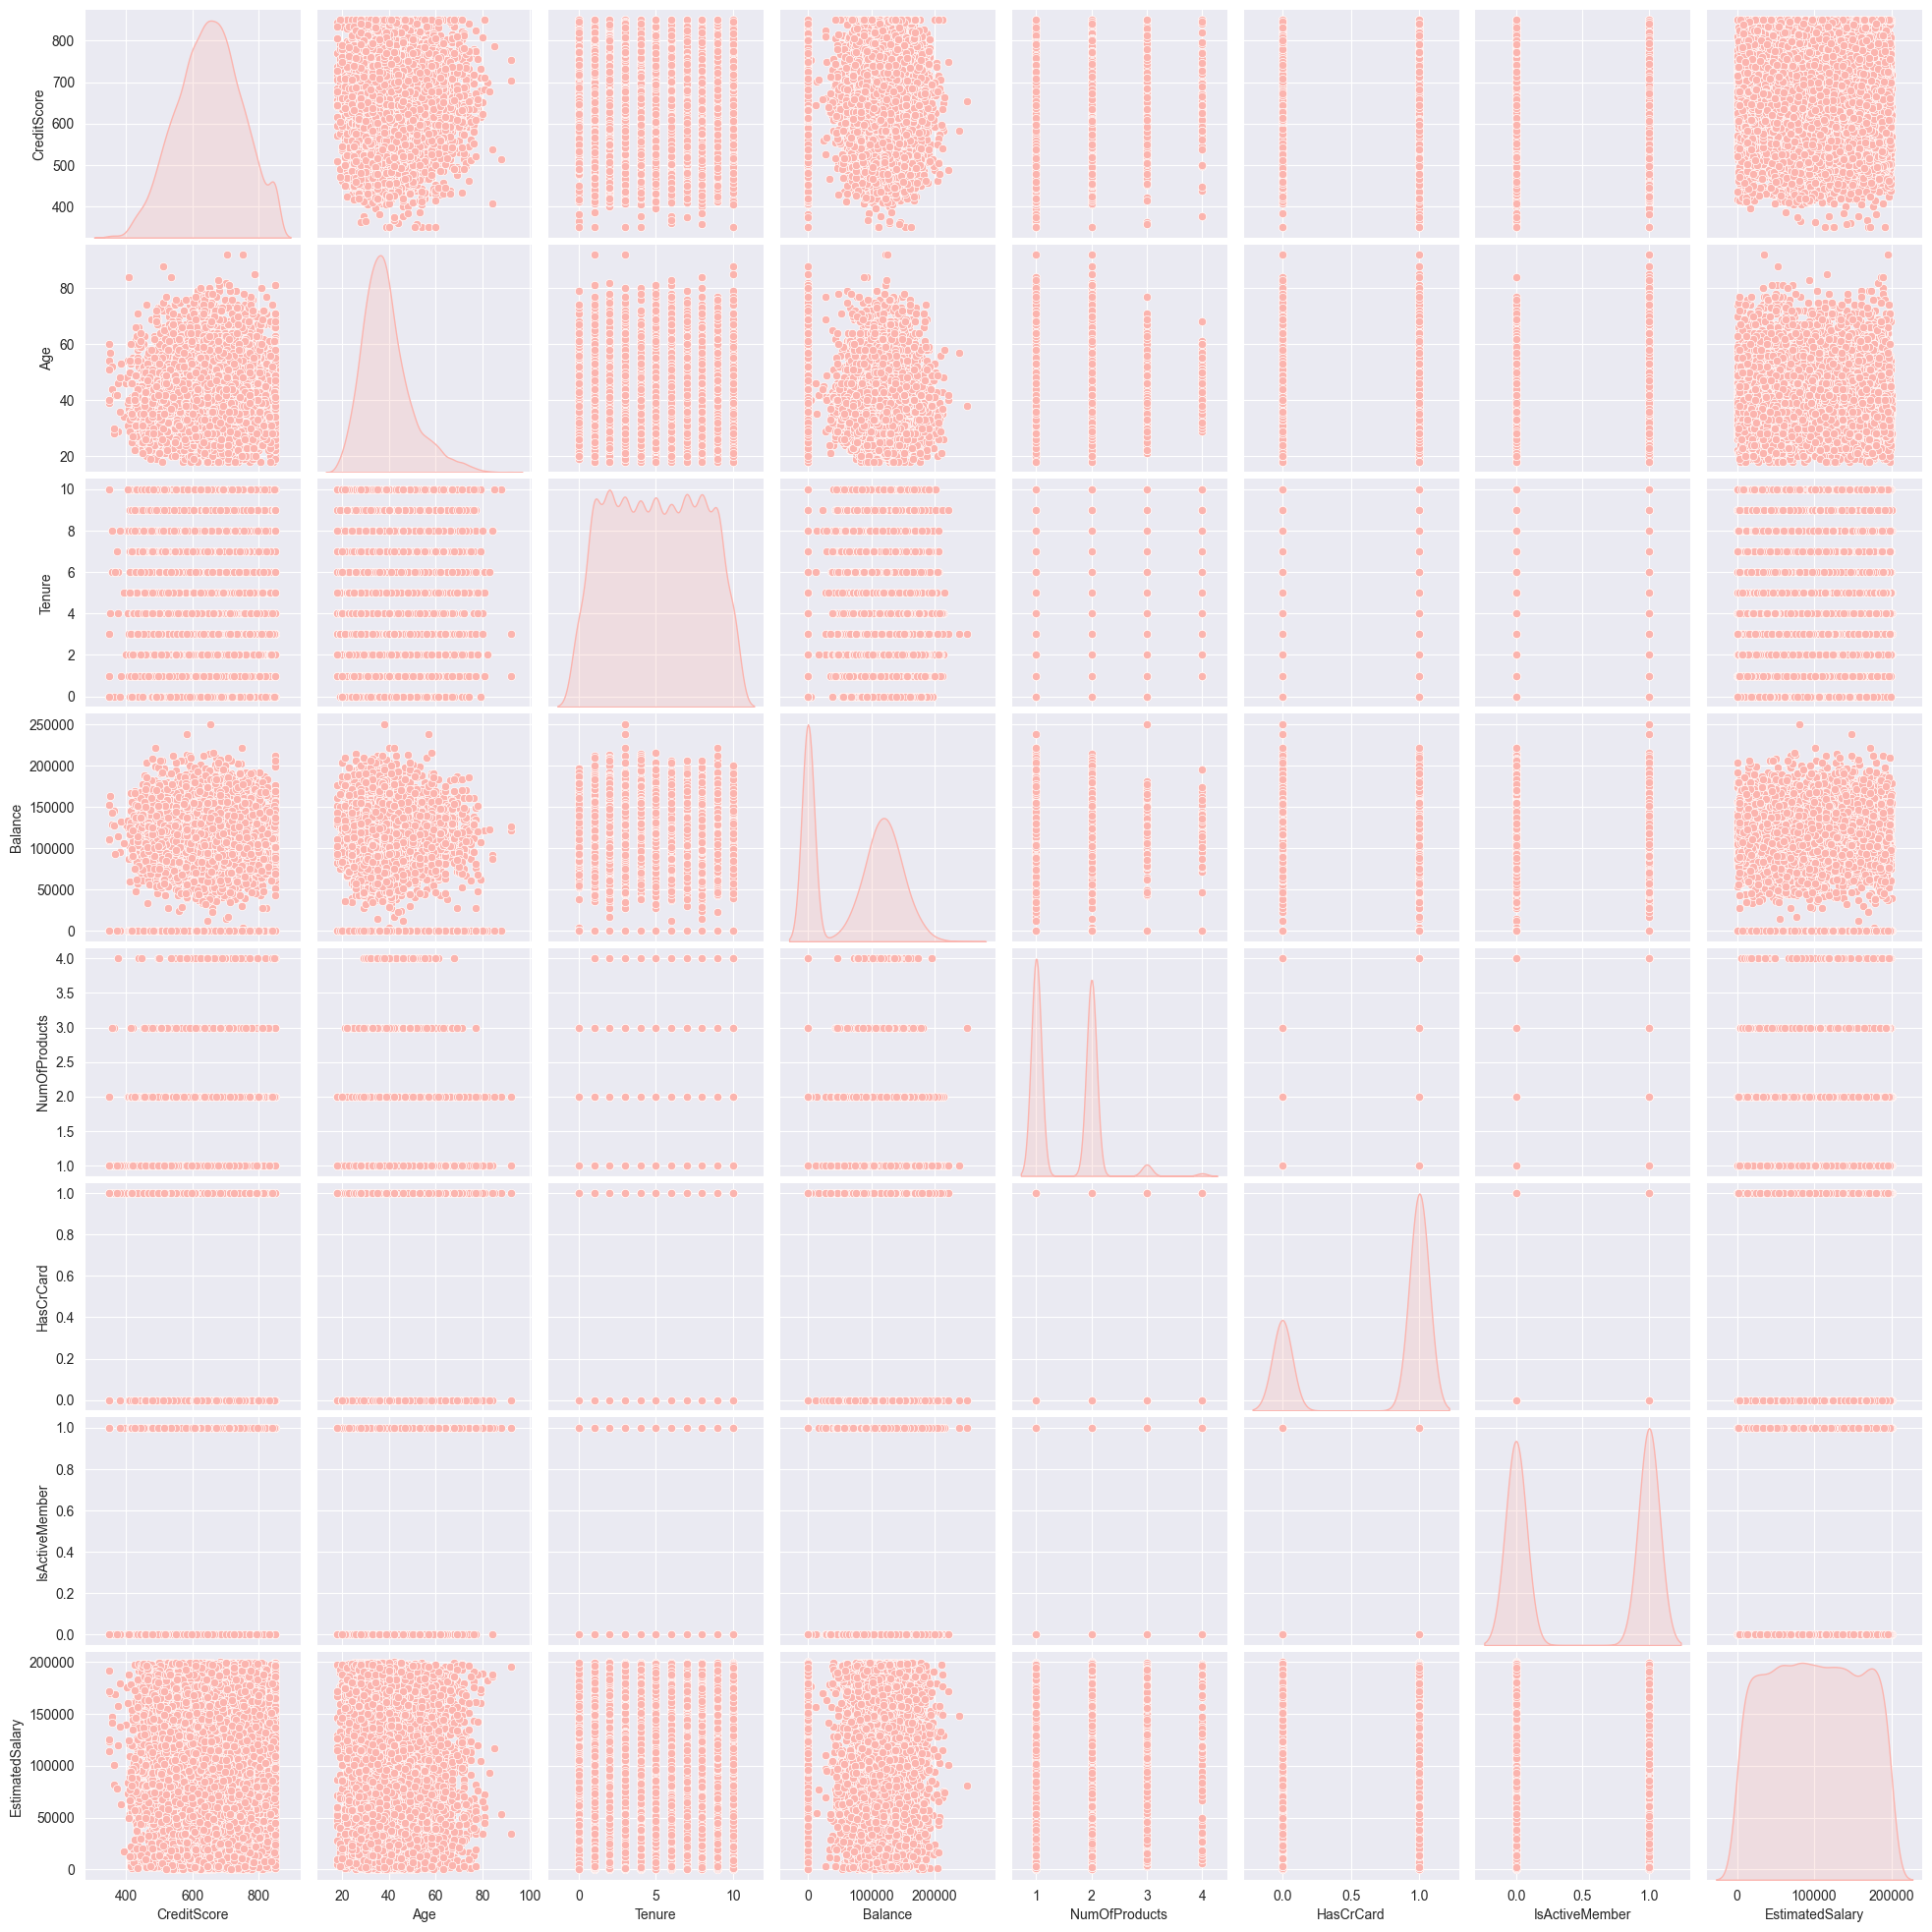

In [ ]:
sns.pairplot(df_num, diag_kind='kde')
plt.show()

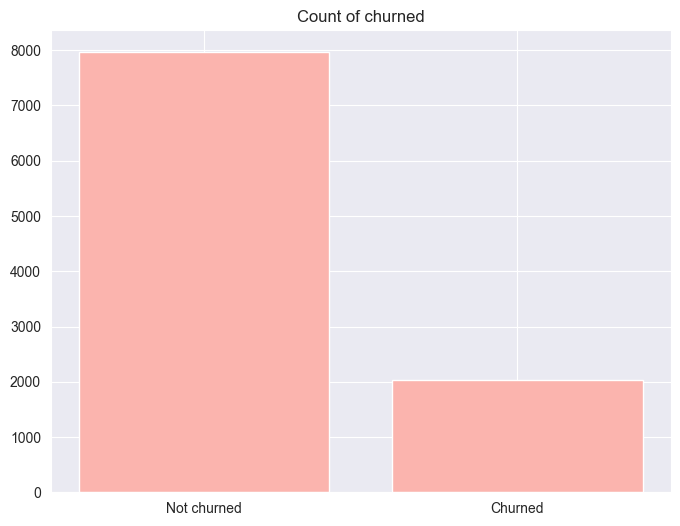

In [ ]:
data = df['Exited'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(['Not churned','Churned'], data)
plt.title('Count of churned')
plt.show()

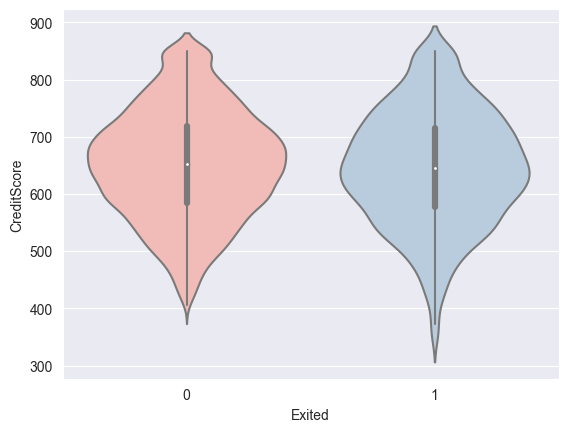

In [ ]:
#plotting box plot between alcohol and quality
sns.violinplot(x='Exited', y='CreditScore', data=df)
plt.show()

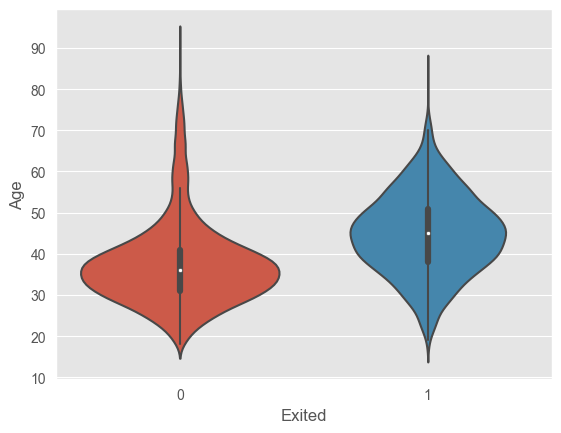

In [ ]:
plt.style.use('ggplot')
sns.violinplot(x='Exited', y='Age', data=df)
plt.show()

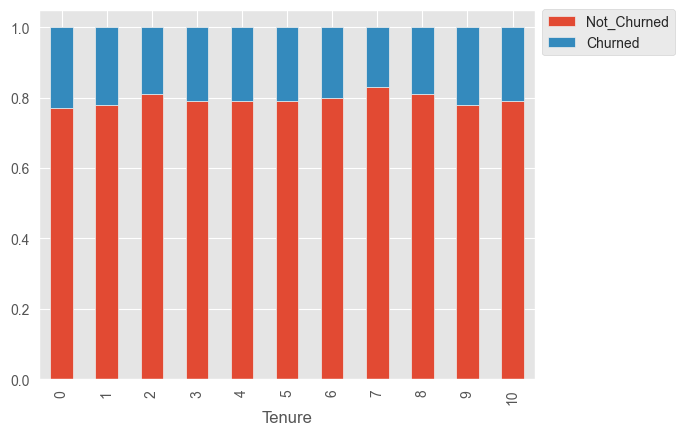

Text(0.5, 0, '111')

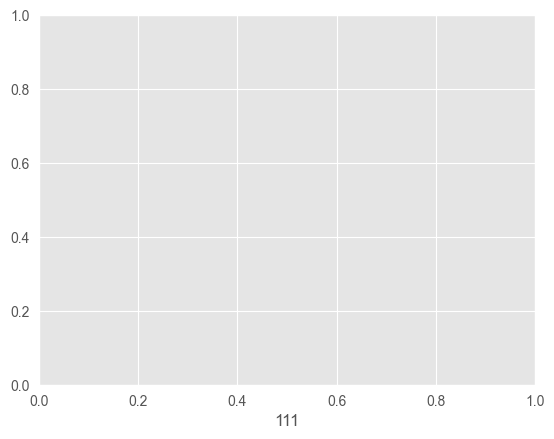

In [ ]:
cross = pandas.crosstab(df['Tenure'],df['Exited'])
cross['%not'] = round(cross[0]/(cross[0]+cross[1]),2)
cross['%yes'] = round(cross[1]/(cross[0]+cross[1]),2)

ls = list(zip(cross['%not'],cross['%yes']))
df_1 = pandas.DataFrame(ls, index=cross.index, columns=['Not_Churned','Churned'])
ax = df_1.plot.bar(stacked = True)
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

Text(0.5, 1.0, '11111')

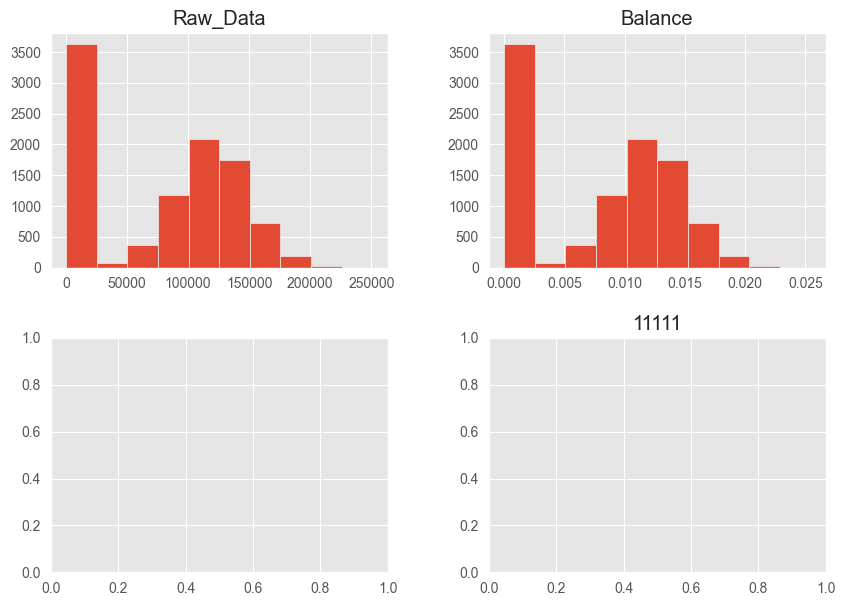

In [ ]:
import numpy as np
from sklearn import preprocessing
nz_balance = preprocessing.normalize([df['Balance'].to_numpy()])
len(nz_balance)
new_balance = list(nz_balance.reshape(-1))
df_ba = pandas.DataFrame({'Balance':new_balance})
f, a = plt.subplots(ncols=2,nrows = 2,figsize=(10, 7))
ax1 = df.Balance.hist(ax=a[0,0])
ax1.set_title('Raw_Data')
ax2 = df_ba.hist(ax=a[0,1])

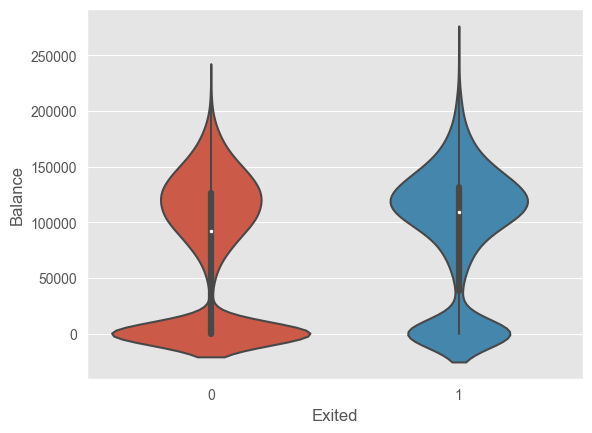

In [ ]:
sns.violinplot(x='Exited', y='Balance', data=df)
plt.show()

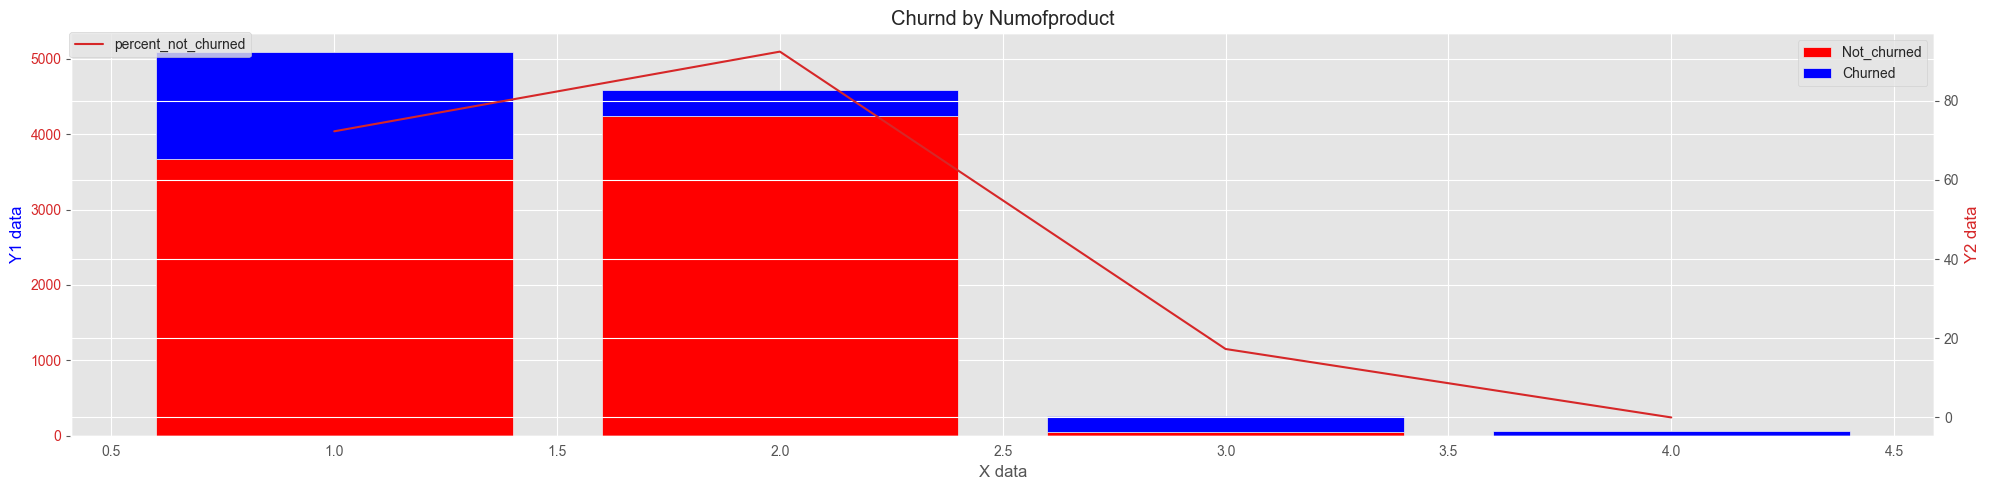

In [ ]:
cross = pandas.crosstab(df['NumOfProducts'],df['Exited'])
cross['%_No_Churn'] = round(100*cross[0]/(cross[0]+cross[1]),2)
#ls = list(zip(cross['%not'],cross['%yes']))
#df_1 = pandas.DataFrame(ls, index=cross.index, columns=['Not_Churned','Churned'])
#df_1.plot.bar(stacked = True)
#plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

y = zip(cross[0],cross[1])
fig, ax1 = plt.subplots(figsize = (20,5))

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='blue')
ax1.bar(cross.index,cross[0],color = 'red', label = 'Not_churned')
ax1.bar(cross.index,cross[1],bottom=cross[0], color = 'blue', label = 'Churned')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend()

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Y2 data', color=color)
ax2.plot(cross.index, cross['%_No_Churn'], color=color, label = 'percent_not_churned')
ax2.legend(bbox_to_anchor=(0.10, 1.02), loc='best')
#ax2.tick_params(axis='y', labelcolor=color)
ax1.set_title('Churnd by Numofproduct')
fig.tight_layout()
plt.show()

In [ ]:
sns.violinplot(x='Exited', y='NumOfProducts', data=df)
plt.show()

In [16]:
data = df
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [17]:
# Convert the 'Age' column to numeric, handling potential errors
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
# 2. Create Age groups
bins = [0, 12, 18, 39, 59,100]  # Adjust bins as needed
labels = ['Children','Adolescents', 'Young Adults', 'Middle-Aged Adults', 'Senior Adults']
data['Age'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame with new features
data.head()


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,Middle-Aged Adults,2,0,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,Middle-Aged Adults,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,Middle-Aged Adults,8,159660.8,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,Middle-Aged Adults,1,0,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,Middle-Aged Adults,2,125510.82,1,1,1,79084.1,0


In [18]:
# Convert the 'EstimatedSalary' column to numeric before applying pd.cut
data['EstimatedSalary'] = pd.to_numeric(data['EstimatedSalary'], errors='coerce')

# Define the bin edges (customize as needed)
bins = [0, 50000, 100000, 150000, 200000, np.inf]

# Define bin labels (optional)
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Use pd.cut to create the bins
data['EstimatedSalary'] = pd.cut(data['EstimatedSalary'], bins=bins, labels=labels, include_lowest=True, right=False)

In [19]:
# Convert the 'CreditScore' column to numeric, handling potential errors
data['CreditScore'] = pd.to_numeric(data['CreditScore'], errors='coerce')

# Define the bin edges (customize as needed)
bins = [300, 580, 670, 740, 800, 900]  # Example bins for credit scores

# Define bin labels (optional)
labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

# Use pd.cut to create the bins
data['CreditScore'] = pd.cut(data['CreditScore'], bins=bins, labels=labels, include_lowest=True, right=False)

# Display the updated DataFrame with the new 'CreditScore_Binned' column
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,Fair,France,Female,Middle-Aged Adults,2,0,1,1,1,Medium,1
1,15647311,Hill,Fair,Spain,Female,Middle-Aged Adults,1,83807.86,1,0,1,Medium,0
2,15619304,Onio,Poor,France,Female,Middle-Aged Adults,8,159660.8,3,1,0,Medium,1
3,15701354,Boni,Good,France,Female,Middle-Aged Adults,1,0,2,0,0,Low,0
4,15737888,Mitchell,Excellent,Spain,Female,Middle-Aged Adults,2,125510.82,1,1,1,Low,0


In [20]:
# Convert the 'Balance' column to numeric, handling potential errors
data['Balance'] = pd.to_numeric(data['Balance'], errors='coerce')

# Define bin edges (customize as needed)
bins = [0, 50000, 100000, 150000, 200000, np.inf]

# Define bin labels (optional)
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Use pd.cut to create the bins with labels
data['Balance'] = pd.cut(data['Balance'], bins=bins, labels=labels, include_lowest=True, right=False)
# Display the updated DataFrame with the new 'Balance_Binned' column
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,Fair,France,Female,Middle-Aged Adults,2,Very Low,1,1,1,Medium,1
1,15647311,Hill,Fair,Spain,Female,Middle-Aged Adults,1,Low,1,0,1,Medium,0
2,15619304,Onio,Poor,France,Female,Middle-Aged Adults,8,High,3,1,0,Medium,1
3,15701354,Boni,Good,France,Female,Middle-Aged Adults,1,Very Low,2,0,0,Low,0
4,15737888,Mitchell,Excellent,Spain,Female,Middle-Aged Adults,2,Medium,1,1,1,Low,0


In [ ]:
def calculate_churn_rate(df):
  churn_count = len(df[df['Churned'] == '1'])  # Assuming 'Exited' column indicates churn (1 for churned, 0 for not churned)
  total_customers = len(df)
  churn_rate = churn_count / total_customers
  return churn_rate

In [ ]:
# Set the number of bootstrap samples
n_iterations = 1000

# Create an empty list to store the bootstrap churn rates
bootstrap_churn_rates = []

# Perform bootstrapping
for _ in range(n_iterations):
  # Resample the data with replacement
  bootstrap_sample = df.sample(n=100, replace=True)  # Assuming 'df' is your DataFrame

  # Calculate the churn rate for the bootstrap sample
  churn_rate = calculate_churn_rate(bootstrap_sample)

  # Append the churn rate to the list
  bootstrap_churn_rates.append(churn_rate)

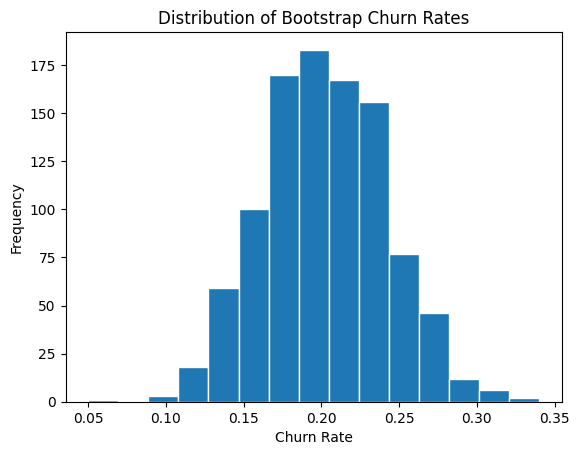

In [ ]:
# Create the histogram
plt.hist(bootstrap_churn_rates, bins=15, edgecolor='white')  # Adjust bins as needed

# Add labels and title
plt.xlabel('Churn Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Bootstrap Churn Rates')

# Display the histogram
plt.show()

In [ ]:
skewness = pd.Series(bootstrap_churn_rates).skew()
# Print the result
print(f"Skewness of bootstrap churn rates: {skewness:.4f}")

Skewness of bootstrap churn rates: 0.0838


In [ ]:
# Calculate the confidence interval (e.g., 95% confidence interval)
confidence_interval = np.percentile(bootstrap_churn_rates, [2.5, 97.5])

# Print the results
print(f"Estimated Churn Rate: {np.mean(bootstrap_churn_rates):.4f}")
print(f"Estimated Churn Rate: {np.std(bootstrap_churn_rates):.4f}")
print(f"95% Confidence Interval: {confidence_interval}")

Estimated Churn Rate: 0.2022
Estimated Churn Rate: 0.0407
95% Confidence Interval: [0.13 0.28]


In [29]:
# prompt: remove columns

# Assuming 'df' is your DataFrame from the previous code
# Example: Remove columns 'RowNumber', 'CustomerId', and 'Surname'
data = data.drop(columns=['CustomerId', 'Surname','Tenure','NumOfProducts'])

# Display the updated DataFrame
data.head()


,CreditScore,Geography,Gender,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Fair,France,Female,Middle-Aged Adults,Very Low,1,1,Medium,1
1,Fair,Spain,Female,Middle-Aged Adults,Low,0,1,Medium,0
2,Poor,France,Female,Middle-Aged Adults,High,1,0,Medium,1
3,Good,France,Female,Middle-Aged Adults,Very Low,0,0,Low,0
4,Excellent,Spain,Female,Middle-Aged Adults,Medium,1,1,Low,0


In [30]:
data.head()

,CreditScore,Geography,Gender,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Fair,France,Female,Middle-Aged Adults,Very Low,1,1,Medium,1
1,Fair,Spain,Female,Middle-Aged Adults,Low,0,1,Medium,0
2,Poor,France,Female,Middle-Aged Adults,High,1,0,Medium,1
3,Good,France,Female,Middle-Aged Adults,Very Low,0,0,Low,0
4,Excellent,Spain,Female,Middle-Aged Adults,Medium,1,1,Low,0


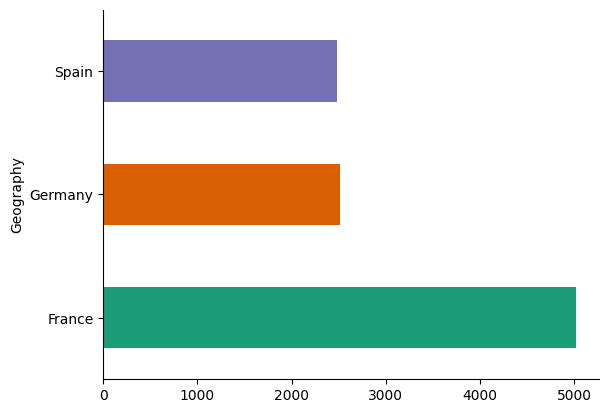

In [ ]:
# @title Geography

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Geography').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [49]:
n_iterations = 100
# Create an empty list to store the bootstrap churn rates
bootstrap_churn_rates = []

def prior_values(df,churned):
  churn_count = len(df[df['Exited'] == churned])
  total_customers = len(df)
  churn_rate = churn_count / total_customers
  return churn_rate

lst = []
# Check if df_sample is empty before sampling
for _ in range(n_iterations):
  # Resample the data with replacement
  bootstrap_sample = data.sample(n=1000, replace=True)
  for i in bootstrap_sample['HasCrCard'].unique(): #Iterate through unique values in the bootstrap_sample itself
    for j in bootstrap_sample['IsActiveMember'].unique(): #Iterate through unique values in the bootstrap_sample itself
      for k in bootstrap_sample['Age'].unique(): #Iterate through unique values in the bootstrap_sample itself
        for l in bootstrap_sample['EstimatedSalary'].unique():#Iterate through unique values in the bootstrap_sample itself
          for m in bootstrap_sample['CreditScore'].unique():#Iterate through unique values in the bootstrap_sample itself
            for n in bootstrap_sample['Balance'].unique():#Iterate through unique values in the bootstrap_sample itself
              for o in bootstrap_sample['Geography'].unique():#Iterate through unique values in the bootstrap_sample itself
                for p in bootstrap_sample['Gender'].unique():#Iterate through unique values in the bootstrap_sample itself
                  # Use the loop variables i, j, k, etc. instead of string literals
                  df_sample = bootstrap_sample[(bootstrap_sample['HasCrCard']==i) &  #using bootstrap_sample here
                  (bootstrap_sample['IsActiveMember']== j) & #using bootstrap_sample here
                  (bootstrap_sample['Age']== k) & #using bootstrap_sample here
                  (bootstrap_sample['EstimatedSalary']==l) & #using bootstrap_sample here
                  (bootstrap_sample['CreditScore']== m) & #using bootstrap_sample here
                  (bootstrap_sample['Balance']== n) & #using bootstrap_sample here
                  (bootstrap_sample['Geography']==o) & #using bootstrap_sample here
                  (bootstrap_sample['Gender']== p)] #using bootstrap_sample here
                  if len(df_sample) == 0 or len(bootstrap_sample) == 0:
                    pass
                  else:
                    prior_value_churn = prior_values(bootstrap_sample,"1")
                    likelihood_value_churn = prior_values(df_sample,'1')
                    posterior_churn = (prior_value_churn*likelihood_value_churn)
                    prior_value_not_churn = prior_values(bootstrap_sample,'0')
                    likelihood_value_not_churn = prior_values(df_sample,'0')
                    posterior_not_churn = (prior_value_not_churn*likelihood_value_not_churn)
                    # Append the churn rate to the list
                    lst.append((i,j,k,l,m,n,o,p,prior_value_churn,
                                likelihood_value_churn,posterior_churn,
                                prior_value_not_churn,likelihood_value_not_churn,
                                posterior_not_churn))


In [50]:
bayes_df = pd.DataFrame(lst,columns=['HasCrCard','IsActiveMember','Age',
                                     'EstimatedSalary','CreditScore','Balance',
                                     'Geography','Gender','prior_value_churn',
                                     'likelihood_value_churn',
                                     'posterior_churn','prior_value_not_churn',
                                     'likelihood_value_not_churn',
                                     'posterior_not_churn'])
bayes_df[['HasCrCard','IsActiveMember','Age',
                                     'EstimatedSalary','CreditScore','Balance',
                                     'Geography','Gender',
                                     'posterior_churn',
                                     'posterior_not_churn']]

,HasCrCard,IsActiveMember,Age,EstimatedSalary,CreditScore,Balance,Geography,Gender,posterior_churn,posterior_not_churn
0,1,0,Middle-Aged Adults,Very Low,Good,High,Germany,Female,0.000000,0.792
1,1,0,Middle-Aged Adults,Very Low,Good,Very Low,France,Female,0.138667,0.264
2,1,0,Middle-Aged Adults,Very Low,Good,Medium,France,Male,0.208000,0.000
3,1,0,Middle-Aged Adults,Very Low,Good,Low,Germany,Male,0.208000,0.000
4,1,0,Middle-Aged Adults,Very Low,Poor,Very Low,France,Male,0.000000,0.792
...,...,...,...,...,...,...,...,...,...,...
74746,0,0,Young Adults,Very Low,Very Good,Medium,Spain,Male,0.069333,0.528
74747,0,0,Young Adults,Very Low,Excellent,Very Low,Spain,Female,0.000000,0.792
74748,0,0,Senior Adults,Low,Very Good,Low,Germany,Male,0.208000,0.000
74749,0,0,Senior Adults,High,Good,Medium,Germany,Male,0.208000,0.000


In [75]:
# prompt: group by mean bayes_df  all column  calculate posterior_churn

bgrouped_df = bayes_df.groupby(['HasCrCard', 'IsActiveMember', 'Age',
                               'EstimatedSalary', 'CreditScore', 'Balance',
                               'Geography', 'Gender'])[['posterior_churn'
                               ,'posterior_not_churn']].mean().reset_index()

sorted_df = grouped_df.sort_values('posterior_not_churn', ascending=False)
sorted_df

,HasCrCard,IsActiveMember,Age,EstimatedSalary,CreditScore,Balance,Geography,Gender,posterior_churn,posterior_not_churn
2170,1,1,Middle-Aged Adults,Low,Excellent,Low,France,Male,0.000000,0.8080
1253,0,1,Young Adults,Very Low,Very Good,Medium,France,Male,0.000000,0.8050
957,0,1,Senior Adults,Very Low,Very Good,Very Low,Spain,Male,0.000000,0.8048
2362,1,1,Middle-Aged Adults,Very Low,Fair,High,Spain,Male,0.000000,0.8028
2059,1,0,Young Adults,Very Low,Poor,Medium,Spain,Female,0.000000,0.8025
...,...,...,...,...,...,...,...,...,...,...
1672,1,0,Senior Adults,Medium,Good,Low,France,Female,0.211286,0.0000
1673,1,0,Senior Adults,Medium,Good,Medium,France,Female,0.213500,0.0000
1674,1,0,Senior Adults,Medium,Good,Medium,France,Male,0.214700,0.0000
122,0,0,Middle-Aged Adults,Low,Very Good,High,Spain,Male,0.204846,0.0000
